In [289]:
url='http://bit.ly/w-data'

In [290]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [291]:
df=pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [293]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## EDA

In [294]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Axes: xlabel='Hours', ylabel='Density'>

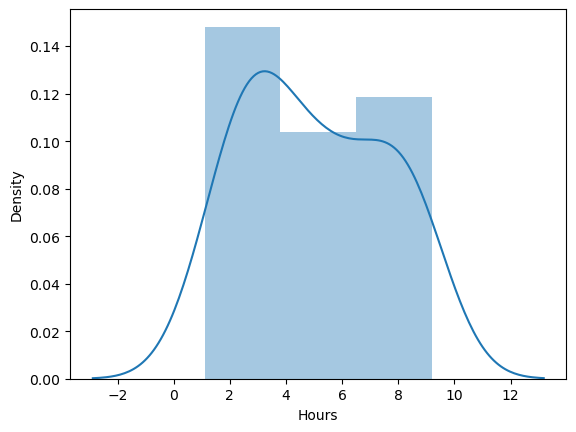

In [295]:
#Visualization
sns.distplot(df["Hours"])

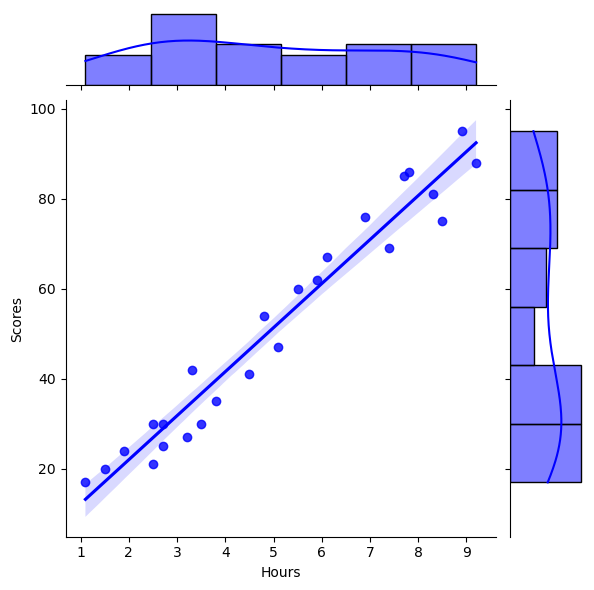

In [296]:
sns.jointplot(x=df["Hours"],y=df["Scores"],kind="reg",color='b')

In [297]:
#split data to train and test data set 

In [298]:
X=df[["Hours"]]

In [299]:
y=df.Scores

In [300]:
from sklearn.model_selection import train_test_split

In [319]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=8,random_state=6)

# Fit train data into Model Building

In [302]:
from sklearn.linear_model import LinearRegression

In [303]:
model=LinearRegression()

In [304]:
model.fit(X_train,y_train)

LinearRegression()

### Traing the data

In [305]:
ypred=model.predict(X_train)

In [306]:
X_train["predicted"]=ypred

In [307]:
X_train["resid"]=ypred-y_train

In [308]:
from sklearn.metrics import r2_score

In [309]:
print("train_score:",r2_score(y_train,ypred))

train_score: 0.949466203326


In [310]:
from sklearn import metrics
print('mean_squared_error:',metrics.mean_squared_error(y_train,ypred))
print('median_absolute_error:',metrics.median_absolute_error(y_train,ypred))

mean_squared_error: 29.9607711325601
median_absolute_error: 4.739317238557305


<Axes: >

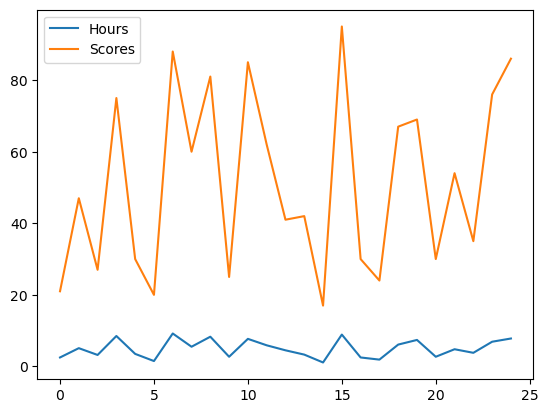

In [311]:
df.plot(kind="line")

## test the model

In [312]:
model.predict(X_test)

array([41.02992927, 57.60808441, 18.60066055, 93.68995148, 84.91328111,
       35.17881569, 28.35251651, 47.85622844])

In [313]:
ypredtest=model.predict(X_test)

In [314]:
print("test_score:",r2_score(ypredtest,y_test))

test_score: 0.9474138457280254


### Evaluating the model

In [317]:
print('mean_squared_error:',metrics.mean_squared_error(y_train,ypred))
print('median_absolute_error:',metrics.median_absolute_error(y_train,ypred))

mean_squared_error: 29.9607711325601
median_absolute_error: 4.739317238557305


In [318]:
print("train_score:",r2_score(y_train,ypred))
print("test_score:",r2_score(ypredtest,y_test))
print("Predicted score",model.predict(Hours)[0])

train_score: 0.949466203326
test_score: 0.9474138457280254
Predicted score 94.17754428011925


### what will if studies 9.25 hr/per day?

In [337]:
Hours=[[9.25]]

In [338]:
print("if studies",Hours[0][0],"hr per day the Score will be:",model.predict(Hours)[0])

if studies 9.25 hr per day the Score will be: 94.17754428011925
